In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [2]:
#read in all csv data files
fertility_df = pd.read_csv("Resources/Fertility.csv")
gdp_df = pd.read_csv("Resources/GDP per capita.csv")
life_expec_df = pd.read_csv("Resources/Life expectancy.csv")
happiness_df = pd.read_csv("Resources/Happiness.csv")
meat_df = pd.read_csv("Resources/Meat consumption.csv")
median_age_df = pd.read_csv("Resources/Median age.csv")
pop_growth_df = pd.read_csv("Resources/Population growth.csv")
sex_df = pd.read_csv("Resources/Sex-ratio.csv")
suicide_df = pd.read_csv("Resources/Suicide rate.csv")
urban_df = pd.read_csv("Resources/Urbanization rate.csv")

In [3]:
#merge data into one dataframe
fg_df = pd.merge(fertility_df,gdp_df, on=['Country','ISO-code'], how="outer")
fgl_df= pd.merge(fg_df, life_expec_df, on=['Country','ISO-code'], how="outer")
fglm_df = pd.merge(fgl_df, meat_df, on=['Country','ISO-code'], how="outer")
fglmm_df = pd.merge(fglm_df, median_age_df, on=['Country','ISO-code'], how="outer")
fglmmp_df = pd.merge(fglmm_df,pop_growth_df, on=['Country','ISO-code'], how="outer")
fglmmps_df = pd.merge(fglmmp_df,sex_df, on=['Country','ISO-code'], how="outer")
fglmmpss_df = pd.merge(fglmmps_df, suicide_df,on=['Country','ISO-code'], how="outer")
world_data = pd.merge(fglmmpss_df,urban_df,on=['Country','ISO-code'], how="outer")
#rename this df

In [4]:
#check the columns
world_data.head()

,Country,Fertility,ISO-code,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate
0,Afghanistan,4.5,AFG,2182.0,64.5,17.3,27.4,2.41,1.03,6.4,26.0
1,Albania,1.6,ALB,14866.0,NaN,NaN,32.9,0.26,0.98,5.6,62.1
2,Algeria,3.0,DZA,16091.0,76.7,18.3,28.1,1.89,1.03,3.3,73.7
3,Andorra,1.3,AND,NaN,81.8,NaN,44.3,0.63,1.06,NaN,87.9
4,Angola,5.5,AGO,6763.0,60.8,19.0,15.9,3.12,0.95,8.9,66.8


In [5]:
#how many rows does the df have?
world_data.shape

(744, 11)

In [6]:
#do all the country names match up? 
world_data["Country"].value_counts()

Guinea            512
Russia              2
Virgin Islands      2
Sierra Leone        1
Romania             1
                 ... 
Indonesia           1
Iran                1
Iraq                1
Ireland             1
Niue                1
Name: Country, Length: 231, dtype: int64

In [7]:
#check out the data for the duplicated countries
world_data.loc[world_data["Country"] == "Guinea"]

,Country,Fertility,ISO-code,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate
73,Guinea,4.7,GIN,2574.0,61.2,6.5,20.1,2.56,1.00,10.5,44.2
74,Guinea,4.7,GIN,2574.0,61.2,6.5,20.1,2.56,1.00,10.5,36.5
75,Guinea,4.7,GIN,2574.0,61.2,6.5,20.1,2.56,1.00,7.4,44.2
76,Guinea,4.7,GIN,2574.0,61.2,6.5,20.1,2.56,1.00,7.4,36.5
77,Guinea,4.7,GIN,2574.0,61.2,6.5,20.1,2.56,0.95,10.5,44.2
...,...,...,...,...,...,...,...,...,...,...,...
580,Guinea,4.5,GIN,2113.0,58.0,13.0,18.9,2.39,1.00,7.4,36.5
581,Guinea,4.5,GIN,2113.0,58.0,13.0,18.9,2.39,0.95,10.5,44.2
582,Guinea,4.5,GIN,2113.0,58.0,13.0,18.9,2.39,0.95,10.5,36.5
583,Guinea,4.5,GIN,2113.0,58.0,13.0,18.9,2.39,0.95,7.4,44.2


In [69]:
world_data.loc[world_data["Country"] == "Equatorial Guinea"]

,Country,Fertility,ISO-code,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,Regional indicator,Happiness Score
54,Equatorial Guinea,4.5,GNQ,19961.0,58.4,NaN,19.8,2.8,1.0,22.0,73.1,NaN,NaN


In [67]:
world_data.loc[world_data["Country"] == "Papua New Guinea"]

,Country,Fertility,ISO-code,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,Regional indicator,Happiness Score
650,Papua New Guinea,3.6,PNG,4081.0,64.3,73.0,23.1,2.17,1.04,7.0,13.3,NaN,NaN


In [70]:
world_data.loc[world_data["Country"] == "Guinea-Bissau"]
#########################is one of the entries labeled "Guinea" supposed to be Guinea-Bissau??

,Country,Fertility,ISO-code,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,Regional indicator,Happiness Score


In [74]:
world_data.loc[world_data["Country"] == "Guinea Bissau"]

,Country,Fertility,ISO-code,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,Regional indicator,Happiness Score


In [ ]:
#virgin islands--us and british virgin islands would technically be counted as part of those respective countries
#two russias--could be from that bit in eastern Europe that's geographically cut off from the rest of Russia?

In [10]:
#remove duplicated countries Guinea, Russia, Virgin Islands since we can't know which set of data is correct
world_data_nog = world_data.loc[world_data['Country'] != 'Guinea',:]
world_data_nogr = world_data_nog.loc[world_data_nog['Country'] != 'Russia', :]
world_data_clean = world_data_nogr.loc[world_data_nogr['Country'] != 'Virgin Islands', :]
world_data_clean["Country"].value_counts()

Afghanistan              1
Portugal                 1
Republic of the Congo    1
Romania                  1
Rwanda                   1
                        ..
India                    1
Indonesia                1
Iran                     1
Iraq                     1
Niue                     1
Name: Country, Length: 228, dtype: int64

In [11]:
happiness_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [12]:
happiness1_df = happiness_df.rename(columns={"Country name":"Country",
                                             "Ladder score":"Happiness Score"})
new_df = happiness1_df[["Country","Regional indicator","Happiness Score"]]
world_data_happy = pd.merge(world_data_clean,new_df, on='Country', how="outer")
world_data_happy.head()

,Country,Fertility,ISO-code,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,Regional indicator,Happiness Score
0,Afghanistan,4.5,AFG,2182.0,64.5,17.3,27.4,2.41,1.03,6.4,26.0,South Asia,2.5669
1,Albania,1.6,ALB,14866.0,NaN,NaN,32.9,0.26,0.98,5.6,62.1,Central and Eastern Europe,4.8827
2,Algeria,3.0,DZA,16091.0,76.7,18.3,28.1,1.89,1.03,3.3,73.7,Middle East and North Africa,5.0051
3,Andorra,1.3,AND,NaN,81.8,NaN,44.3,0.63,1.06,NaN,87.9,NaN,NaN
4,Angola,5.5,AGO,6763.0,60.8,19.0,15.9,3.12,0.95,8.9,66.8,NaN,NaN


In [60]:
###########################################

#Using isnull() to select all rows with NaN under an entire DataFrame:
world_data_happy[world_data_happy.isnull().any(axis=1)]

,Country,Fertility,ISO-code,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,Regional indicator,Happiness Score
1,Albania,1.6,ALB,14866.0,NaN,NaN,32.9,0.26,0.98,5.6,62.1,Central and Eastern Europe,4.8827
3,Andorra,1.3,AND,NaN,81.8,NaN,44.3,0.63,1.06,NaN,87.9,NaN,NaN
4,Angola,5.5,AGO,6763.0,60.8,19.0,15.9,3.12,0.95,8.9,66.8,NaN,NaN
5,Antigua and Barbuda,2.0,ATG,30593.0,76.9,56.0,31.9,1.03,0.89,0.5,24.4,NaN,NaN
8,Aruba,1.9,ABW,NaN,NaN,NaN,39.3,0.44,0.90,NaN,43.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Guinea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,4.9493
236,Gambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,4.7506
237,Palestinian Territories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle East and North Africa,4.5528
238,Congo (Kinshasa),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,4.3110


In [ ]:
###########################################
#will need to drop russia, guinea, guinea-bissau, and virgin islands from happiness data
#how to match up country names that are different between happiness csv and other data?

In [82]:
###########################################
#Just to see the unique record count 
world_data_happy["Country"].count()

240

In [83]:
###########################################
#identify columns with missing data
print(world_data.isna().sum())

Country                0
Fertility             42
ISO-code              13
GDP per capita        52
Life expectancy       58
Meat consumption      55
Median age            19
Population growth     36
Sex-ratio             17
Suicide rate          61
Urbanization rate     25
Regional indicator    89
Happiness Score       89
dtype: int64


In [ ]:
###########################################
world_data.dropna(axis=0, how='any', inplace=True)

In [ ]:
###########################################
print(world_data.isna().sum())

In [78]:
world_data_happy.dtypes

Country                object
Fertility             float64
ISO-code               object
GDP per capita        float64
Life expectancy       float64
Meat consumption      float64
Median age            float64
Population growth     float64
Sex-ratio             float64
Suicide rate          float64
Urbanization rate     float64
Regional indicator     object
Happiness Score       float64
dtype: object

In [64]:
world_data_happy.describe()

,Fertility,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,Happiness Score
count,196.000000,188.000000,182.000000,183.000000,219.000000,204.000000,221.000000,179.000000,215.000000,153.00000
mean,2.643367,22751.449468,72.283791,45.489617,30.821461,1.376127,1.007466,9.633520,61.612558,5.47324
std,1.226547,22752.689767,7.454920,34.948167,8.822690,1.271743,0.205198,5.421513,23.896971,1.11227
min,1.100000,314.500000,52.800000,3.000000,15.400000,-1.600000,0.830000,0.400000,9.100000,2.56690
25%,1.700000,5315.000000,67.150000,15.250000,23.300000,0.450000,0.950000,5.750000,42.800000,4.72410
50%,2.200000,14991.500000,73.650000,34.500000,30.300000,1.245000,0.990000,9.100000,62.600000,5.51500
75%,3.525000,33926.500000,77.275000,70.900000,38.350000,2.175000,1.010000,12.500000,81.200000,6.22850
max,6.100000,113352.000000,84.700000,145.900000,53.100000,9.130000,3.390000,30.200000,100.000000,7.80870


In [65]:
world_data_happy.corr()

,Fertility,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,Happiness Score
Fertility,1.000000,-0.617685,-0.846563,-0.600932,-0.862992,0.621788,-0.046917,0.135512,-0.536666,-0.664204
GDP per capita,-0.617685,1.000000,0.699434,0.713110,0.675766,-0.225349,0.178101,-0.043398,0.628001,0.745094
Life expectancy,-0.846563,0.699434,1.000000,0.682673,0.825438,-0.514909,0.050496,-0.296850,0.591800,0.773279
Meat consumption,-0.600932,0.713110,0.682673,1.000000,0.672236,-0.346259,0.114686,-0.104096,0.533297,0.744400
Median age,-0.862992,0.675766,0.825438,0.672236,1.000000,-0.662085,-0.040573,-0.000491,0.489963,0.681637
Population growth,0.621788,-0.225349,-0.514909,-0.346259,-0.662085,1.000000,0.400921,-0.129595,-0.243146,-0.462123
Sex-ratio,-0.046917,0.178101,0.050496,0.114686,-0.040573,0.400921,1.000000,-0.184194,0.130498,0.090314
Suicide rate,0.135512,-0.043398,-0.296850,-0.104096,-0.000491,-0.129595,-0.184194,1.000000,-0.062737,-0.069992
Urbanization rate,-0.536666,0.628001,0.591800,0.533297,0.489963,-0.243146,0.130498,-0.062737,1.000000,0.676249
Happiness Score,-0.664204,0.745094,0.773279,0.744400,0.681637,-0.462123,0.090314,-0.069992,0.676249,1.000000


In [ ]:
#1st relationship. Meat consumption vs Life Expectancy--Nicole
#2st relationship. Meat consumption vs Urbanization Rate--Emily
#3rd relationship. Meat consumption vs Happiness Score--Jueting
#4th relationship. Meat consumption vs Fertility--Elena
#5th relationship. Meat consumption vs GDP--Ashley

In [76]:
#set columns equal to variables for graphing
urban = world_data_happy["Urbanization rate"]
meat = world_data_happy["Meat consumption"]

In [90]:
#drop na's for successful graphing
##############would like to record which/how many countries were dropped for each variable
urban_noblanks = urban.dropna()
meat_noblanks = meat.dropna()

ValueError: x and y must be the same size

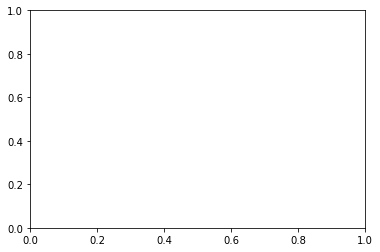

In [91]:
####x and y must be same size to graph, need to make sure dropping na's leads to overlap between variables

plt.scatter(urban_noblanks, meat_noblanks)
plt.grid()
plt.xlabel("Urbanization Rate")
plt.ylabel("Meat Consumption")
plt.title("Urbanization Rate vs Meat Consumption")

(slope, intercept, rvalue, pvalue, stderr) = linregress(urban_noblanks, meat_noblanks)
regress_values = urban_noblanks * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(urban_noblanks,regress_values,"r-")
plt.annotate(line_eq,(20,125),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

{'whiskers': [<matplotlib.lines.Line2D at 0x16a4a098d30>,
 'caps': [<matplotlib.lines.Line2D at 0x16a4a0a5490>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a4a098ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x16a4a0a5bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16a4a0a5f40>],
 'means': []}

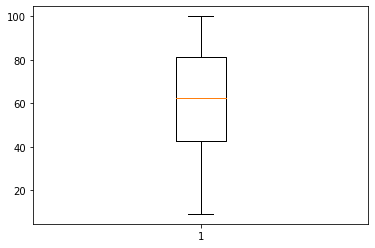

In [89]:
plt.boxplot(urban_noblanks)

In [87]:
quartiles = urban_noblanks.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of urbanization rate is: {lowerq}")
print(f"The upper quartile of urbanization rate is: {upperq}")
print(f"The interquartile range of urbanization rate is: {iqr}")
print(f"The the median of urbanization rate is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of urbanization rate is: 42.8
The upper quartile of urbanization rate is: 81.2
The interquartile range of urbanization rate is: 38.400000000000006
The the median of urbanization rate is: 62.6 
Values below -14.800000000000011 could be outliers.
Values above 138.8 could be outliers.


In [ ]:
#scatter plots of urban vs. meat, subplots by region?